In [1]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report ,roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from scipy.stats import chi2_contingency, f_oneway
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif





Milestone 1

Data Collection

In [2]:
#read the dataset depression
df=pd.read_csv(r"C:\Users\arwah\OneDrive\Desktop\HealthCare Project\datasets\Project Data.csv")
df.head(9)

,id,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,...,Family Issues,Uncertain Future,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level
0,2,Male,23.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,...,2,1,2,1,Green,No,1,Pop,10,6.655000
1,8,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,...,3,2,4,1,Yellow,No,1,Rock,4,5.123958
2,26,Male,17.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,...,5,1,5,0,Yellow,Yes,2,Pop,4,4.190609
3,30,Female,17.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,...,3,2,1,1,Black,Yes,4,Classical,9,7.467984
4,32,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,...,1,1,1,1,Blue,No,4,Pop,9,0.406585
5,33,Male,25.0,Pune,2.0,5.70,3.0,Less than 5 hours,Healthy,LLB,...,3,3,5,0,Yellow,Yes,4,Jazz,7,4.207805
6,52,Male,24.0,Thane,3.0,9.54,4.0,7-8 hours,Healthy,BSc,...,4,5,3,1,Blue,No,0,Classical,4,4.956508
7,56,Female,24.0,Chennai,2.0,8.04,4.0,Less than 5 hours,Unhealthy,Class 12,...,1,5,1,1,Yellow,Yes,2,Jazz,8,9.909730
8,59,Male,19.0,Nagpur,3.0,9.79,1.0,7-8 hours,Moderate,B.Ed,...,2,2,1,0,Green,No,1,Pop,19,1.486374


Data Exploration

In [3]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'Social Isolation', 'Bullying', 'Family Issues', 'Uncertain Future',
       'Social Media Usage', 'Drug/Smoking', 'Favorite Color', 'Pet Ownership',
       'Daily Coffee Intake', 'Music Genre Preference', 'PHQ-9',
       'Cortisol_Level'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   CGPA                                   27901 non-null  float64
 6   Study Satisfaction                     27901 non-null  float64
 7   Sleep Duration                         27901 non-null  object 
 8   Dietary Habits                         27901 non-null  object 
 9   Degree                                 27901 non-null  object 
 10  Have you ever had suicidal thoughts ?  27901 non-null  object 
 11  Wo

In [5]:
df.describe()

,id,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression,Social Isolation,Bullying,Family Issues,Uncertain Future,Social Media Usage,Drug/Smoking,Daily Coffee Intake,PHQ-9,Cortisol_Level
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,21.034766,3.141214,7.656104,2.943837,7.156984,3.139867,0.690011,2.995950,0.500090,2.997814,2.996989,3.006559,0.498763,1.991828,6.669008,4.196608
std,40641.175216,2.654828,1.381465,1.470707,1.361148,3.707642,1.437347,0.462497,1.413587,0.500009,1.413819,1.416844,1.414895,0.500007,1.406999,5.148011,2.572537
min,2.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000081
25%,35039.000000,19.000000,2.000000,6.290000,2.000000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,2.000000,0.000000,1.000000,3.000000,2.037070
50%,70684.000000,21.000000,3.000000,7.770000,3.000000,8.000000,3.000000,1.000000,3.000000,1.000000,3.000000,3.000000,3.000000,0.000000,2.000000,6.000000,4.062870
75%,105818.000000,23.000000,4.000000,8.920000,4.000000,10.000000,4.000000,1.000000,4.000000,1.000000,4.000000,4.000000,4.000000,1.000000,3.000000,9.000000,6.098431
max,140699.000000,25.000000,5.000000,10.000000,5.000000,12.000000,5.000000,1.000000,5.000000,1.000000,5.000000,5.000000,5.000000,1.000000,4.000000,20.000000,9.999471


In [6]:
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
Social Isolation                         0
Bullying                                 0
Family Issues                            0
Uncertain Future                         0
Social Media Usage                       0
Drug/Smoking                             0
Favorite Color                           0
Pet Ownership                            0
Daily Coffe

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
Social Isolation                         0
Bullying                                 0
Family Issues                            0
Uncertain Future                         0
Social Media Usage                       0
Drug/Smoking                             0
Favorite Color                           0
Pet Ownership                            0
Daily Coffe

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(27898, 27)

In [11]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()


column_types_df = pd.DataFrame({
    'Feature Name': numeric_columns + categorical_columns,
    'Data Type': ['Numeric'] * len(numeric_columns) + ['Categorical'] * len(categorical_columns)
})

column_types_df

,Feature Name,Data Type
0,id,Numeric
1,Age,Numeric
2,Academic Pressure,Numeric
3,CGPA,Numeric
4,Study Satisfaction,Numeric
5,Work/Study Hours,Numeric
6,Financial Stress,Numeric
7,Depression,Numeric
8,Social Isolation,Numeric
9,Bullying,Numeric


In [12]:
df.nunique()

id                                       27898
Gender                                       2
Age                                         10
City                                        52
Academic Pressure                            6
CGPA                                       332
Study Satisfaction                           6
Sleep Duration                               5
Dietary Habits                               4
Degree                                      24
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             5
Family History of Mental Illness             2
Depression                                   2
Social Isolation                             5
Bullying                                     2
Family Issues                                5
Uncertain Future                             5
Social Media Usage                           5
Drug/Smoking                                 2
Favorite Colo

In [13]:
column_name = "Gender"
value_counts = df[column_name].value_counts()
print("Gender values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Work/Study Hours"
value_counts = df[column_name].value_counts()
print("Study Hours values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Social Media Usage"
value_counts = df[column_name].value_counts()
print("Social Media Usage values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Favorite Color"
value_counts = df[column_name].value_counts()
print("Favorite Color values")
for value, count in value_counts.items():
    print(f"{value}: {count}")                

      

Gender values
Male: 15546
Female: 12352
----------------------------------------------------------------
Study Hours values
10.0: 4234
12.0: 3170
11.0: 2892
8.0: 2509
6.0: 2247
9.0: 2025
7.0: 2001
0.0: 1700
4.0: 1614
2.0: 1590
3.0: 1470
5.0: 1296
1.0: 1150
----------------------------------------------------------------
Social Media Usage values
4: 5645
5: 5602
1: 5565
3: 5553
2: 5533
----------------------------------------------------------------
Favorite Color values
Green: 5633
Black: 5619
Yellow: 5614
Red: 5597
Blue: 5435


In [14]:
column_name = "Age"
value_counts = df[column_name].value_counts()
print("Age values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Study Satisfaction"
value_counts = df[column_name].value_counts()
print("Study Satisfaction values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Sleep Duration"
value_counts = df[column_name].value_counts()
print("Sleep Duration values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Dietary Habits"
value_counts = df[column_name].value_counts()
print("Dietary Habits values")
for value, count in value_counts.items():
    print(f"{value}: {count}")



Age values
20.0: 3682
24.0: 3633
21.0: 3146
25.0: 3110
23.0: 3062
19.0: 3001
18.0: 2930
22.0: 2547
16.0: 1419
17.0: 1368
----------------------------------------------------------------
Study Satisfaction values
4.0: 6359
2.0: 5838
3.0: 5820
1.0: 5449
5.0: 4422
0.0: 10
----------------------------------------------------------------
Sleep Duration values
Less than 5 hours: 8309
7-8 hours: 7346
5-6 hours: 6181
More than 8 hours: 6044
Others: 18
----------------------------------------------------------------
Dietary Habits values
Unhealthy: 10316
Moderate: 9921
Healthy: 7649
Others: 12


In [15]:
column_name = "Pet Ownership"
value_counts = df[column_name].value_counts()
print("Pet Ownership values")
for value, count in value_counts.items():
    print(f"{value}: {count}")
    
print("----------------------------------------------------------------")
column_name = "Music Genre Preference"
value_counts = df[column_name].value_counts()
print("Music Genre Preference values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Drug/Smoking"
value_counts = df[column_name].value_counts()
print("Drug/Smoking values")
for value, count in value_counts.items():
    print(f"{value}: {count}")    


Pet Ownership values
No: 13999
Yes: 13899
----------------------------------------------------------------
Music Genre Preference values
Classical: 5756
Jazz: 5637
Pop: 5515
Hip-Hop: 5504
Rock: 5486
----------------------------------------------------------------
Drug/Smoking values
0: 13984
1: 13914


In [16]:
#Identify  inconsistencies
print(df['Academic Pressure'].unique())
print("----------------------------------------------------------------------")
print(df['Daily Coffee Intake'].unique())
print("----------------------------------------------------------------------")
print(df['Music Genre Preference'].unique())
print("----------------------------------------------------------------------")
print(df['Degree'].unique())

[5. 2. 3. 4. 1. 0.]
----------------------------------------------------------------------
[1 2 4 0 3]
----------------------------------------------------------------------
['Pop' 'Rock' 'Classical' 'Jazz' 'Hip-Hop']
----------------------------------------------------------------------
['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'LLB' 'Class 12' 'B.Ed' 'BE' 'M.Ed'
 'MSc' 'BHM' 'M.Pharm' 'MCA' 'BBA' 'MA' 'B.Com' 'MBA' 'M.Com' 'B.Arch'
 'B.Tech' 'ME' 'MHM' 'Others']


In [17]:
column_name = "Degree"

value_counts = df[column_name].value_counts()

for value, count in value_counts.items():
    print(f"{value}: {count}")

Class 12: 6080
B.Ed: 2043
B.Com: 1695
B.Arch: 1673
BCA: 1616
B.Tech: 1325
MSc: 1190
BHM: 1119
BSc: 1082
MCA: 1044
M.Tech: 1022
B.Pharm: 990
BBA: 891
LLB: 855
M.Ed: 821
BE: 810
BA: 809
M.Com: 734
M.Pharm: 582
MBA: 562
MA: 544
MHM: 191
ME: 185
Others: 35


In [18]:
print((df["CGPA"].unique()>10).sum())
print("-----------------------------------------------------------------")
print((df["Cortisol_Level"]>9).sum())
print("-----------------------------------------------------------------")
print((df["PHQ-9"]>19).sum())

0
-----------------------------------------------------------------
1290
-----------------------------------------------------------------
538


In [19]:
#put target column data in last column
new = df['Depression']
df.drop(columns=['Depression'], axis=1, inplace=True)
df['Depression'] = new
df

,id,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,...,Uncertain Future,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Depression
0,2,Male,23.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,...,1,2,1,Green,No,1,Pop,10,6.655000,1
1,8,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,...,2,4,1,Yellow,No,1,Rock,4,5.123958,0
2,26,Male,17.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,...,1,5,0,Yellow,Yes,2,Pop,4,4.190609,0
3,30,Female,17.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,...,2,1,1,Black,Yes,4,Classical,9,7.467984,1
4,32,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,...,1,1,1,Blue,No,4,Pop,9,0.406585,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,25.0,Surat,5.0,5.75,5.0,5-6 hours,Unhealthy,Class 12,...,1,5,1,Blue,No,1,Hip-Hop,1,2.362973,0
27897,140686,Male,19.0,Ludhiana,2.0,9.40,3.0,Less than 5 hours,Healthy,MSc,...,3,5,1,Yellow,Yes,0,Classical,5,2.683625,0
27898,140689,Male,23.0,Faridabad,3.0,6.61,4.0,5-6 hours,Unhealthy,B.Arch,...,4,4,1,Green,No,1,Jazz,8,4.565350,0
27899,140690,Female,18.0,Ludhiana,5.0,6.88,2.0,Less than 5 hours,Healthy,Class 12,...,3,5,0,Red,Yes,0,Jazz,11,9.556027,1


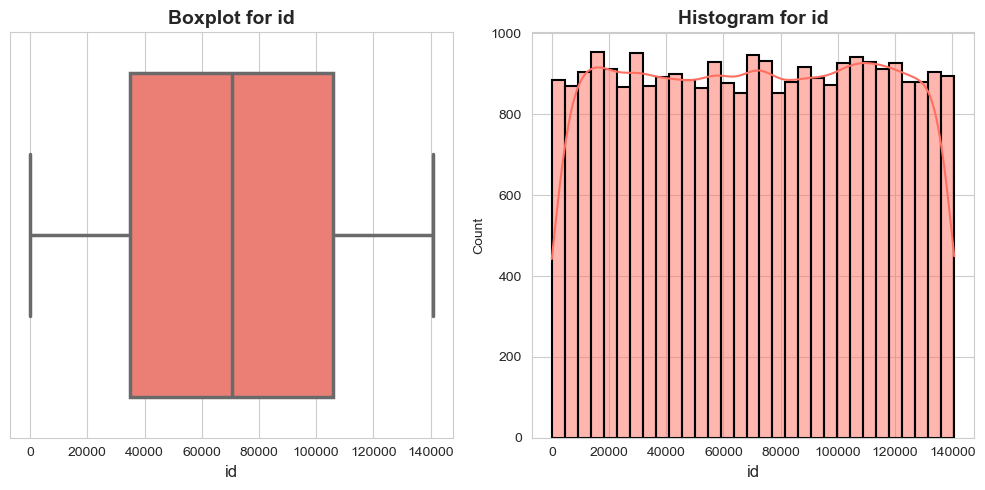

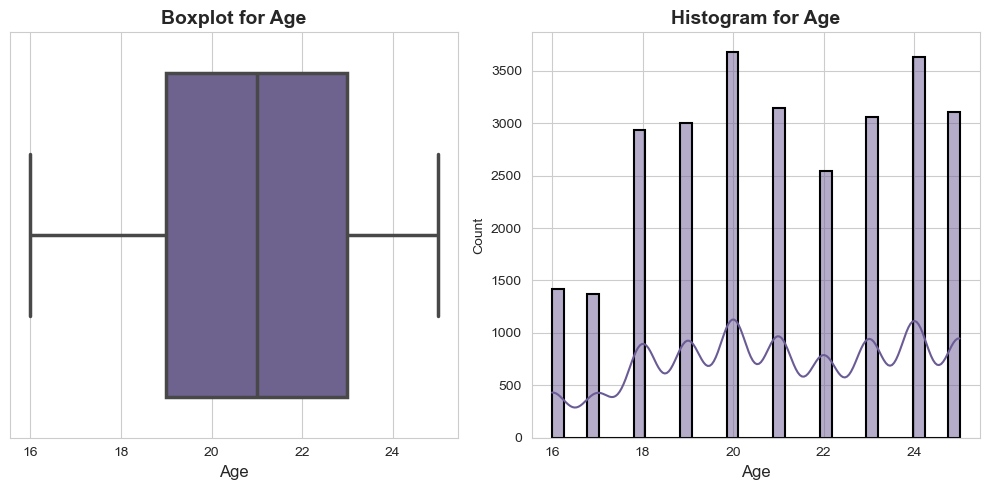

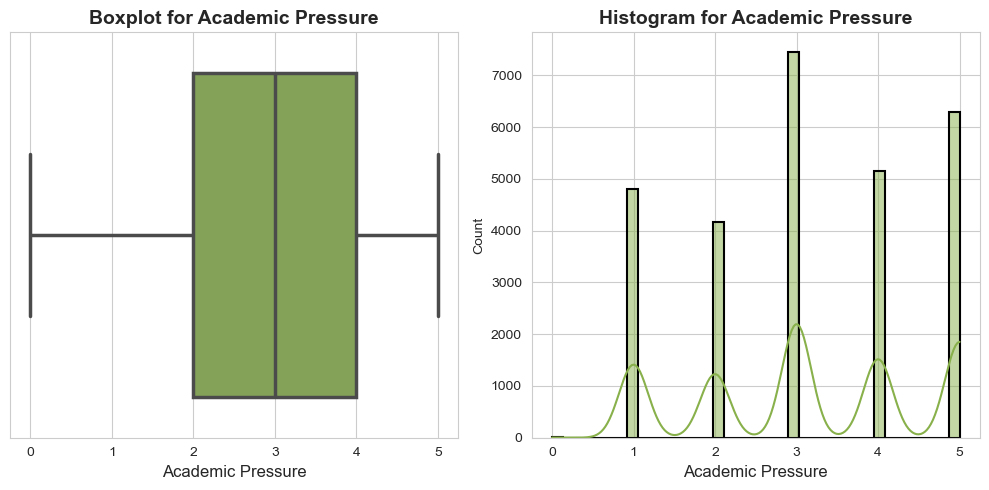

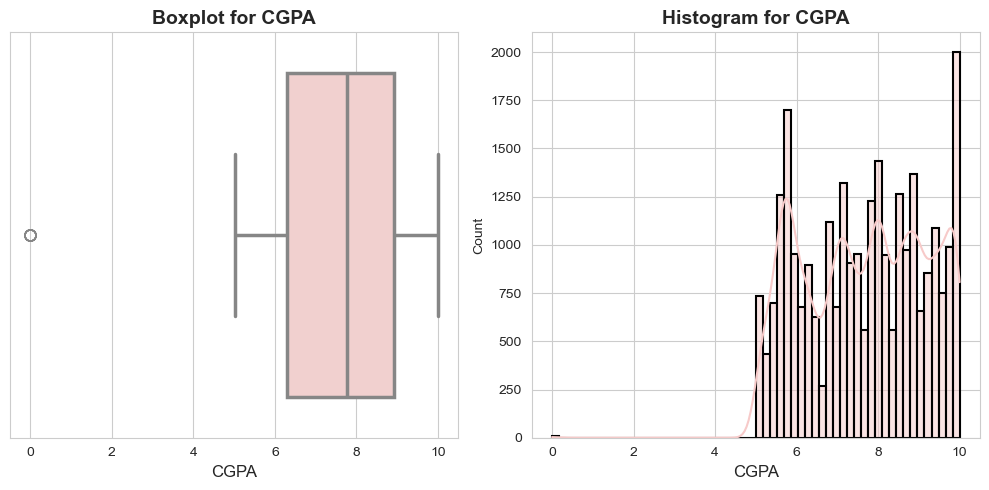

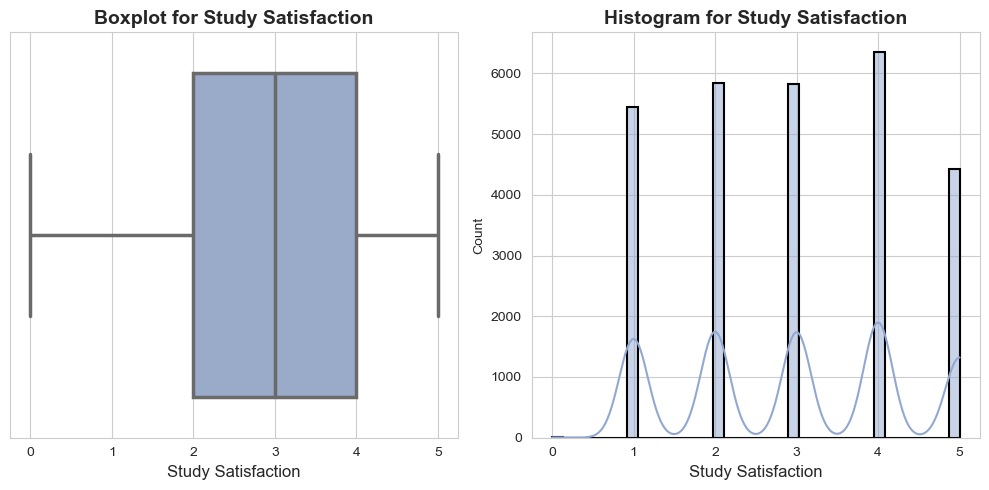

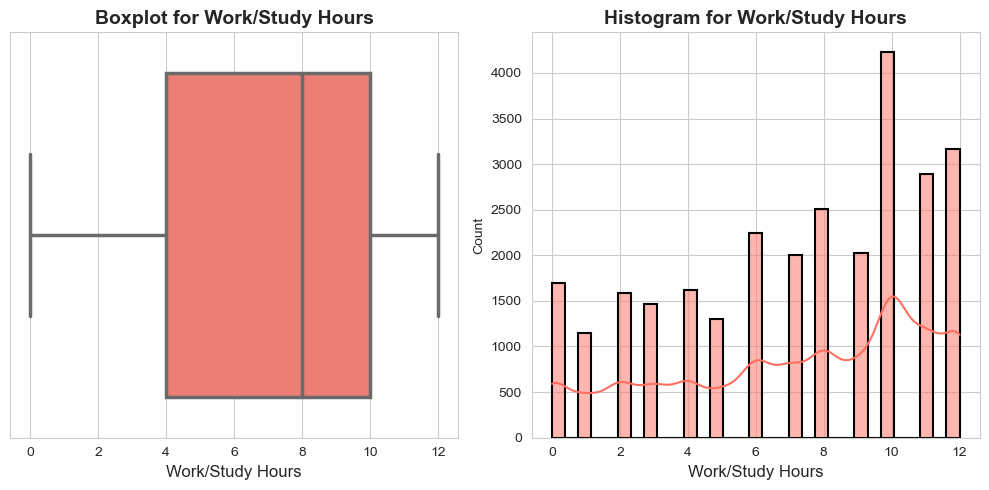

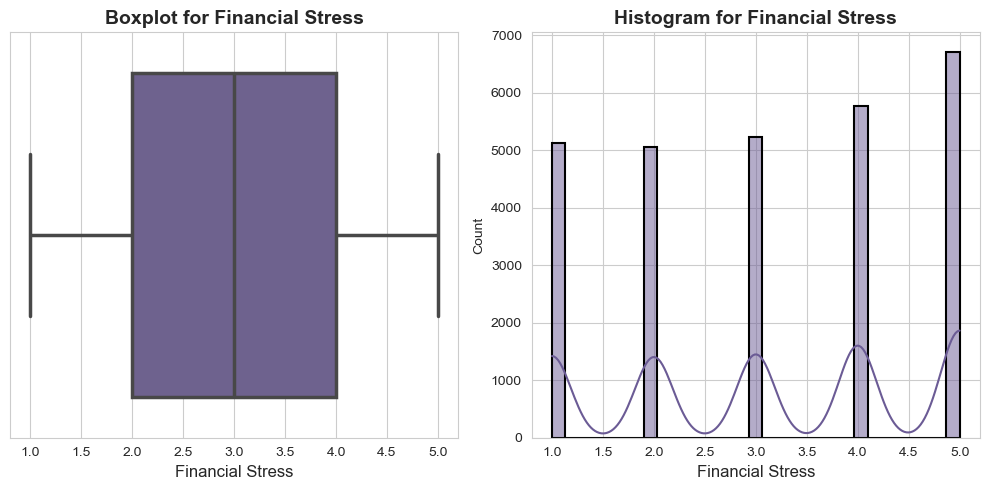

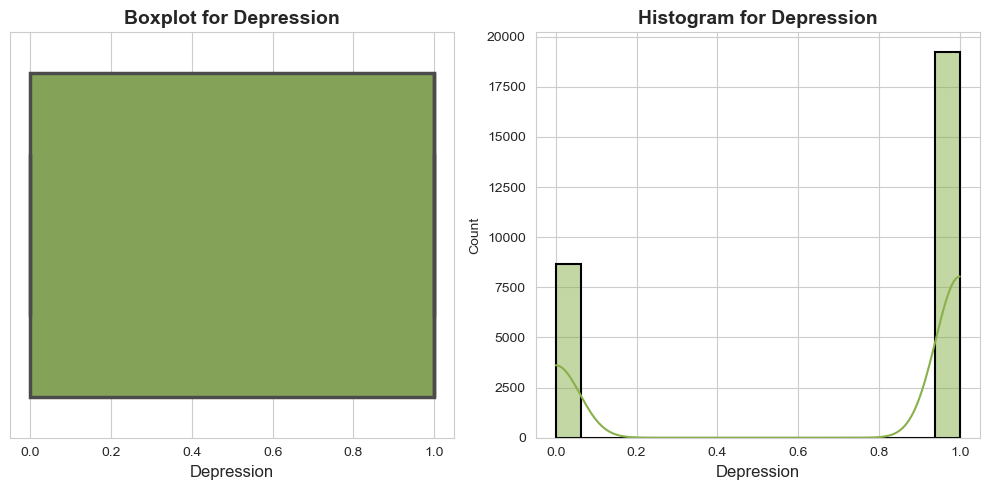

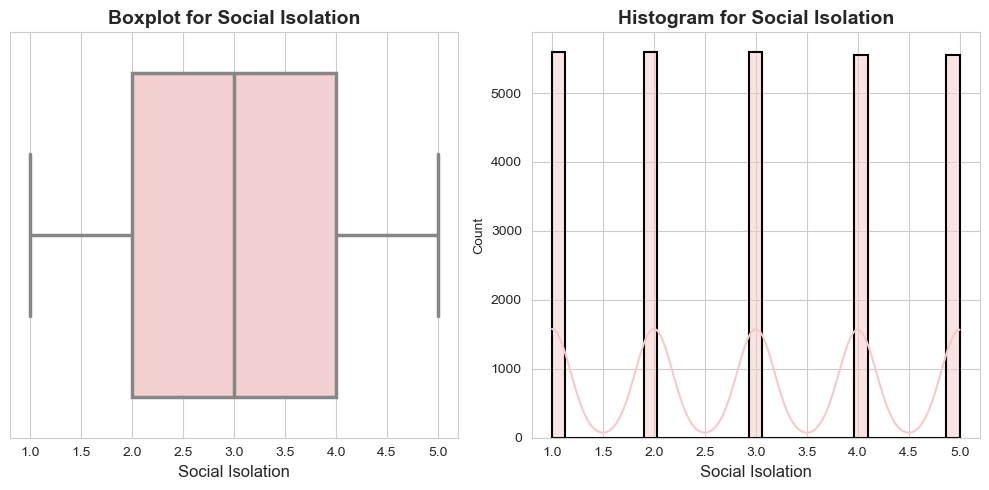

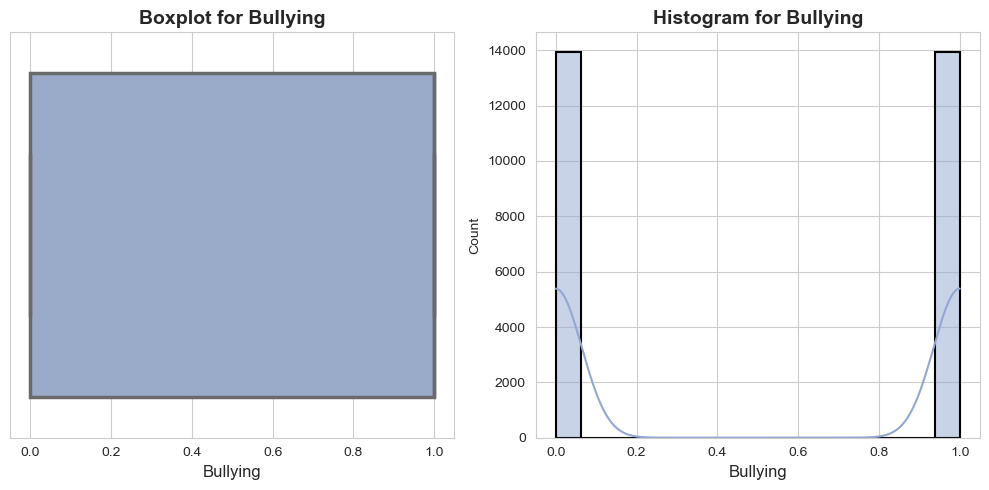

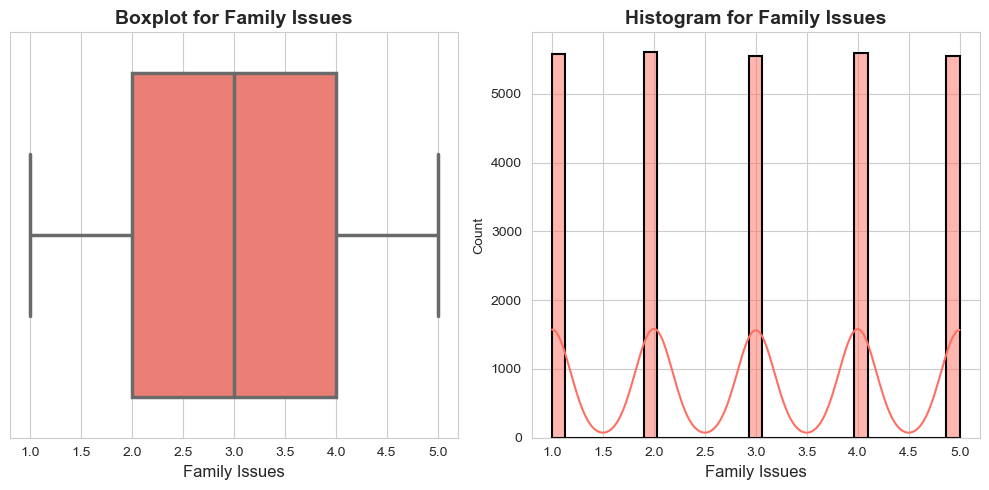

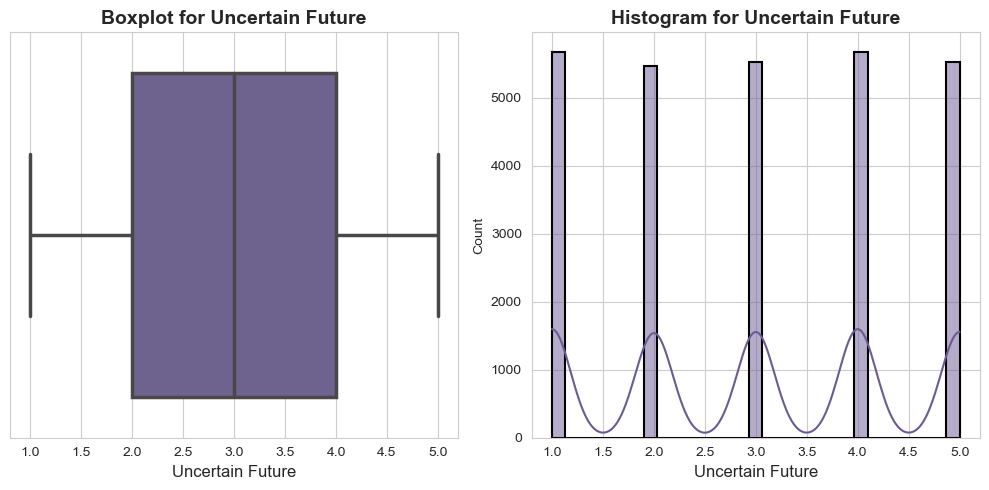

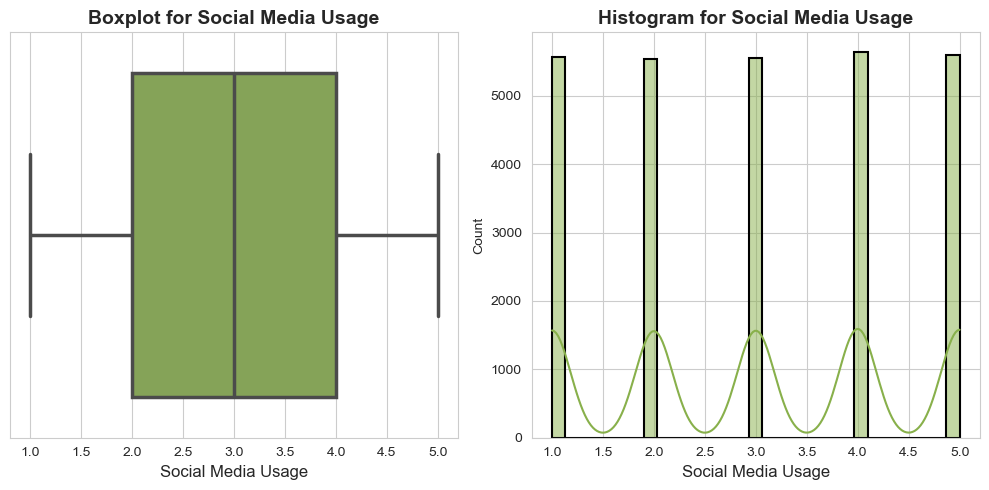

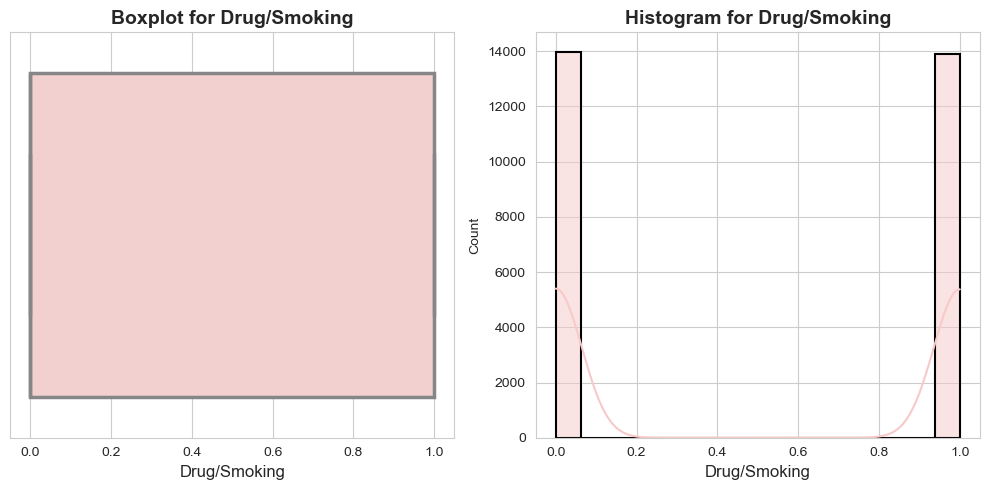

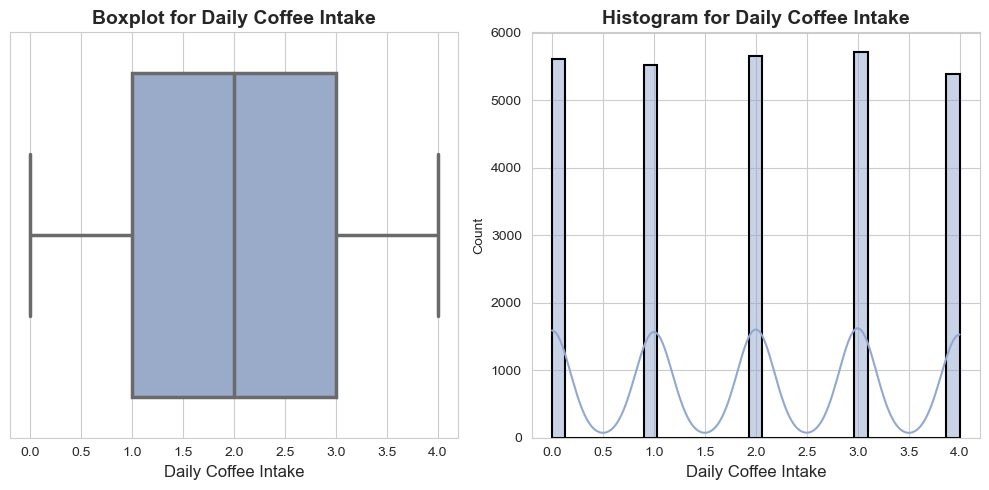

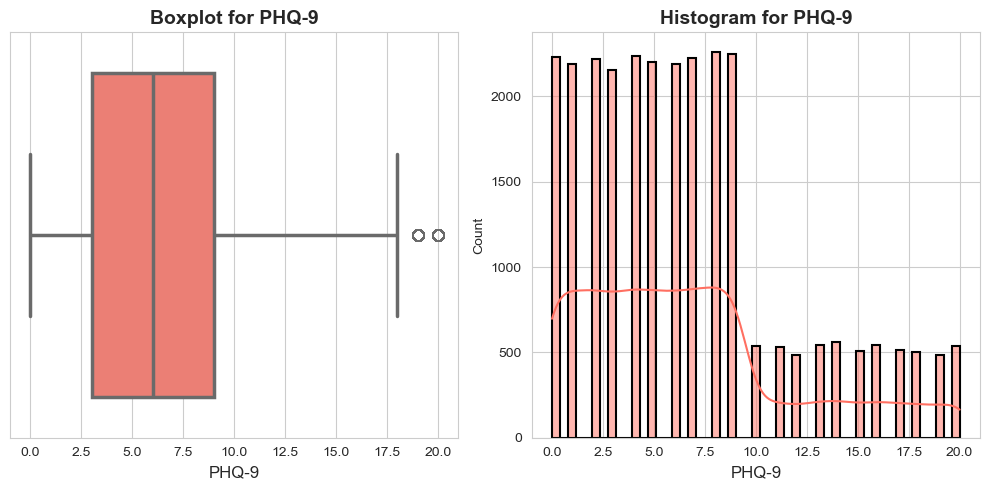

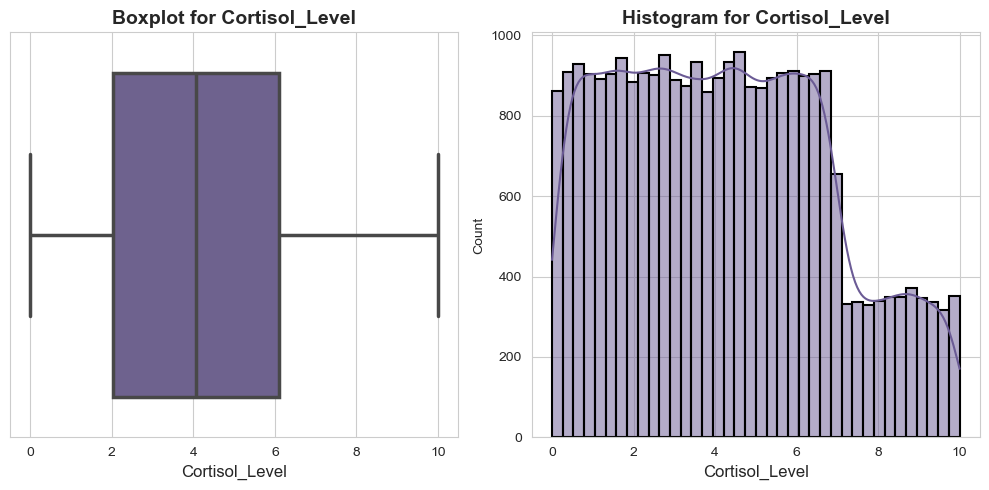

In [20]:
# Customize colors and styles
sns.set_style("whitegrid")
custom_palette = ["#ff6f61", "#6b5b95", "#88b04b", "#f7cac9", "#92a8d1"]

# Visualize the outliers
for i, col in enumerate(numeric_columns):
    plt.figure(figsize=(10, 5))
    
    # Boxplot with custom colors
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col], color=custom_palette[i % len(custom_palette)], linewidth=2.5, fliersize=8)
    plt.title(f'Boxplot for {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    
    # Histogram with KDE and custom color
    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True, color=custom_palette[i % len(custom_palette)], edgecolor="black", linewidth=1.5)
    plt.title(f'Histogram for {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    
    plt.tight_layout()
    plt.show()

In [21]:
#Identify outliers for numeric columns
outliers_summary = {}
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1                  
   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_count = outliers.shape[0]
    outliers_summary[col] = outliers_count

for col, count in outliers_summary.items():
    print(f"Column: {col}, Outliers: {count}")

Column: id, Outliers: 0
Column: Age, Outliers: 0
Column: Academic Pressure, Outliers: 0
Column: CGPA, Outliers: 9
Column: Study Satisfaction, Outliers: 0
Column: Work/Study Hours, Outliers: 0
Column: Financial Stress, Outliers: 0
Column: Depression, Outliers: 0
Column: Social Isolation, Outliers: 0
Column: Bullying, Outliers: 0
Column: Family Issues, Outliers: 0
Column: Uncertain Future, Outliers: 0
Column: Social Media Usage, Outliers: 0
Column: Drug/Smoking, Outliers: 0
Column: Daily Coffee Intake, Outliers: 0
Column: PHQ-9, Outliers: 1022
Column: Cortisol_Level, Outliers: 0


In [22]:
def calculate_outlier_percentage(df):
    outlier_data = []

    for column in df.select_dtypes(include=[np.number]): 
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df)) * 100

        outlier_data.append([column, round(outlier_percentage, 2)])

    return pd.DataFrame(outlier_data, columns=['Feature', 'Outlier Percentage'])

outlier_df = calculate_outlier_percentage(df)
print(outlier_df)

                Feature  Outlier Percentage
0                    id                0.00
1                   Age                0.00
2     Academic Pressure                0.00
3                  CGPA                0.03
4    Study Satisfaction                0.00
5      Work/Study Hours                0.00
6      Financial Stress                0.00
7      Social Isolation                0.00
8              Bullying                0.00
9         Family Issues                0.00
10     Uncertain Future                0.00
11   Social Media Usage                0.00
12         Drug/Smoking                0.00
13  Daily Coffee Intake                0.00
14                PHQ-9                3.66
15       Cortisol_Level                0.00
16           Depression                0.00


Data Preprocessing

In [23]:
enc=LabelEncoder()
for col in categorical_columns:
    df[col] = enc.fit_transform(df[col])
df    

,id,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,...,Uncertain Future,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Depression
0,2,1,23.0,51,5.0,8.97,2.0,0,0,3,...,1,2,1,2,0,1,3,10,6.655000,1
1,8,0,24.0,3,2.0,5.90,5.0,0,1,10,...,2,4,1,4,0,1,4,4,5.123958,0
2,26,1,17.0,44,3.0,7.03,5.0,2,0,5,...,1,5,0,4,1,2,3,4,4.190609,0
3,30,0,17.0,49,3.0,5.59,2.0,1,1,7,...,2,1,1,0,1,4,0,9,7.467984,1
4,32,0,25.0,16,4.0,8.13,3.0,0,1,16,...,1,1,1,1,0,4,3,9,0.406585,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,0,25.0,45,5.0,5.75,5.0,0,3,11,...,1,5,1,1,0,1,1,1,2.362973,0
27897,140686,1,19.0,25,2.0,9.40,3.0,2,0,22,...,3,5,1,4,1,0,0,5,2.683625,0
27898,140689,1,23.0,9,3.0,6.61,4.0,0,3,0,...,4,4,1,2,0,1,2,8,4.565350,0
27899,140690,0,18.0,25,5.0,6.88,2.0,2,0,11,...,3,5,0,3,1,0,2,11,9.556027,1


In [24]:
#make sure that every column is encoded correctly
print(df.dtypes)  

id                                         int64
Gender                                     int32
Age                                      float64
City                                       int32
Academic Pressure                        float64
CGPA                                     float64
Study Satisfaction                       float64
Sleep Duration                             int32
Dietary Habits                             int32
Degree                                     int32
Have you ever had suicidal thoughts ?      int32
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness           int32
Social Isolation                           int64
Bullying                                   int64
Family Issues                              int64
Uncertain Future                           int64
Social Media Usage                         int64
Drug/Smoking                               int64
Favorite Color      

In [25]:
# def apply_scaling_if_needed(df, target_column):
#     numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
    
#     # no need to apply scaling on target column
#     if target_column in numeric_columns:
#         numeric_columns.remove(target_column)

#     scaler = StandardScaler()

#     for column in numeric_columns:
#         unique_values = set(df[column].unique())

#         if unique_values == {0, 1}:  
#             print(f"No need for scaling on {column}")
#         else:
#             df[column] = scaler.fit_transform(df[[column]])
#             print(f"Scaling applied on {column}")

# apply_scaling_if_needed(df, target_column='Depression')



Data Visualization

In [26]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import random

# # Define a color palette for variety
# colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0", "#ffb3e6", "#ff6666", "#c4e17f", "#76d7c4", "#f7c6c7", "#f4a261", "#2a9d8f"]

# fig, axes = plt.subplots(4, 3, figsize=(18, 20))
# fig.suptitle("Mental Health Data Visualization", fontsize=16)

# # Have you ever had suicidal thoughts?
# sns.countplot(data=df, x="Have you ever had suicidal thoughts ?", ax=axes[0, 0], color=random.choice(colors))
# axes[0, 0].set_title("Suicidal Thoughts Distribution", pad=20)

# # Work/Study Hours
# sns.histplot(df["Work/Study Hours"], bins=30, kde=True, color=random.choice(colors), ax=axes[0, 1])
# axes[0, 1].set_title("Work/Study Hours Distribution", pad=20)

# # Financial Stress
# sns.countplot(data=df, x="Financial Stress", ax=axes[0, 2], color=random.choice(colors))
# axes[0, 2].set_title("Financial Stress Distribution", pad=20)

# # Family History of Mental Illness
# sns.countplot(data=df, x="Family History of Mental Illness", hue="Depression", ax=axes[1, 0], palette="Set2")
# axes[1, 0].set_title("Depression by Family History of Mental Illness", pad=20)

# # Depression
# sns.countplot(data=df, x="Depression", ax=axes[1, 1], color=random.choice(colors))
# axes[1, 1].set_title("Depression Distribution", pad=20)

# # Social Isolation
# sns.countplot(data=df, x="Social Isolation", hue="Depression", ax=axes[1, 2], palette="husl")
# axes[1, 2].set_title("Depression by Social Isolation", pad=20)

# # Bullying
# sns.countplot(data=df, x="Bullying", hue="Depression", ax=axes[2, 0], palette="coolwarm")
# axes[2, 0].set_title("Depression by Bullying", pad=20)

# # Family Issues
# sns.countplot(data=df, x="Family Issues", hue="Depression", ax=axes[2, 1], palette="muted")
# axes[2, 1].set_title("Depression by Family Issues", pad=20)

# # Uncertain Future
# sns.countplot(data=df, x="Uncertain Future", hue="Depression", ax=axes[2, 2], palette="dark")
# axes[2, 2].set_title("Depression by Uncertain Future", pad=20)

# # Music Genre Preference
# sns.countplot(data=df, x="Music Genre Preference", hue="Depression", ax=axes[3, 0], palette="Paired")
# axes[3, 0].set_title("Depression by Music Genre Preference", pad=20)

# # Daily Coffee Intake
# sns.countplot(data=df, x="Daily Coffee Intake", hue="Depression", ax=axes[3, 1], palette="pastel")
# axes[3, 1].set_title("Depression by Daily Coffee Intake", pad=20)

# # Dietary Habits values
# sns.countplot(data=df, x="Pet Ownership", hue="Depression", ax=axes[3, 2], palette="cool")
# axes[3, 2].set_title("Depression by Pet Ownership", pad=20)

# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()

In [27]:
# import plotly.express as px
# import pandas as pd

# # استخدام عينة صغيرة إذا كان عدد الصفوف كبيرًا
# df_sample = df.sample(min(5000, len(df)), random_state=42)

# # توزيع العمر
# fig_age = px.histogram(df_sample, x="age", nbins=30, title="Age Distribution", 
#                        color_discrete_sequence=["skyblue"], marginal="box")

# # توزيع مرض السكري
# df_diabetes_count = df_sample["diabetes"].value_counts().reset_index()
# df_diabetes_count.columns = ["diabetes", "count"]
# fig_diabetes = px.bar(df_diabetes_count, 
#                       x="diabetes", y="count", title="Diabetes Distribution", 
#                       labels={"diabetes": "Diabetes", "count": "Count"},
#                       color="diabetes")

# # توزيع الجنس
# df_gender_count = df_sample["gender"].value_counts().reset_index()
# df_gender_count.columns = ["gender", "count"]
# fig_gender = px.bar(df_gender_count, 
#                     x="gender", y="count", title="Gender Distribution", 
#                     labels={"gender": "Gender", "count": "Count"},
#                     color="gender")

# # مرض السكري حسب الجنس
# fig_diabetes_gender = px.bar(df_sample, x="gender", color="diabetes", title="Diabetes by Gender", 
#                              barmode="group")

# # مرض السكري حسب الفئات العمرية
# df_sample["Age Group"] = pd.cut(df_sample["age"], bins=[50, 60, 70, 80, 90, 100], labels=["50-60", "60-70", "70-80", "80-90", "90+"])
# fig_diabetes_age = px.bar(df_sample, x="Age Group", color="diabetes", title="Diabetes by Age Group", 
#                           barmode="group")

# # عرض الرسوم في المتصفح لتسريع الأداء
# fig_age.show("browser")
# fig_diabetes.show("browser")
# fig_gender.show("browser")
# fig_diabetes_gender.show("browser")
# fig_diabetes_age.show("browser")


In [28]:
# import plotly.express as px
# import pandas as pd

# # استخدام عينة صغيرة إذا كان عدد الصفوف كبيرًا
# df_sample = df.sample(min(5000, len(df)), random_state=42)

# # توزيع العمر
# fig_age = px.histogram(df_sample, x="age", nbins=30, title="Age Distribution", 
#                        color_discrete_sequence=["skyblue"], marginal="box")

# # توزيع مرض السكري
# df_diabetes_count = df_sample["diabetes"].value_counts().reset_index()
# df_diabetes_count.columns = ["diabetes", "count"]
# fig_diabetes = px.bar(df_diabetes_count, 
#                       x="diabetes", y="count", title="Diabetes Distribution", 
#                       labels={"diabetes": "Diabetes", "count": "Count"},
#                       color="diabetes")

# # توزيع الجنس
# df_gender_count = df_sample["gender"].value_counts().reset_index()
# df_gender_count.columns = ["gender", "count"]
# fig_gender = px.bar(df_gender_count, 
#                     x="gender", y="count", title="Gender Distribution", 
#                     labels={"gender": "Gender", "count": "Count"},
#                     color="gender")

# # مرض السكري حسب الجنس
# fig_diabetes_gender = px.bar(df_sample, x="gender", color="diabetes", title="Diabetes by Gender", 
#                              barmode="group")

# # مرض السكري حسب الفئات العمرية
# df_sample["Age Group"] = pd.cut(df_sample["age"], bins=[50, 60, 70, 80, 90, 100], labels=["50-60", "60-70", "70-80", "80-90", "90+"])
# fig_diabetes_age = px.bar(df_sample, x="Age Group", color="diabetes", title="Diabetes by Age Group", 
#                           barmode="group")

# # عرض الرسوم في المتصفح لتسريع الأداء
# fig_age.show("browser")
# fig_diabetes.show("browser")
# fig_gender.show("browser")
# fig_diabetes_gender.show("browser")
# fig_diabetes_age.show("browser")


In [29]:
# import plotly.express as px
# import pandas as pd

# # توزيع العمر
# fig_age = px.histogram(df, x="age", nbins=30, title="Age Distribution", 
#                        color_discrete_sequence=["skyblue"], marginal="box")

# # توزيع مرض السكري
# df_diabetes_count = df["diabetes"].value_counts().reset_index()
# df_diabetes_count.columns = ["diabetes", "count"]  # إعادة تسمية الأعمدة
# fig_diabetes = px.bar(df_diabetes_count, 
#                       x="diabetes", y="count", title="Diabetes Distribution", 
#                       labels={"diabetes": "Diabetes", "count": "Count"},
#                       color="diabetes", color_discrete_sequence=px.colors.qualitative.Pastel)

# # توزيع الجنس
# df_gender_count = df["gender"].value_counts().reset_index()
# df_gender_count.columns = ["gender", "count"]
# fig_gender = px.bar(df_gender_count, 
#                     x="gender", y="count", title="Gender Distribution", 
#                     labels={"gender": "Gender", "count": "Count"},
#                     color="gender", color_discrete_sequence=px.colors.qualitative.Set2)

# # مرض السكري حسب الجنس
# fig_diabetes_gender = px.bar(df, x="gender", color="diabetes", title="Diabetes by Gender", 
#                              barmode="group", color_discrete_sequence=px.colors.qualitative.Set1)

# # مرض السكري حسب الفئات العمرية
# df["Age Group"] = pd.cut(df["age"], bins=[50, 60, 70, 80, 90, 100], labels=["50-60", "60-70", "70-80", "80-90", "90+"])
# fig_diabetes_age = px.bar(df, x="Age Group", color="diabetes", title="Diabetes by Age Group", 
#                           barmode="group", color_discrete_sequence=px.colors.qualitative.Vivid)

# # مرض السكري حسب الدولة (أكثر 10 دول)
# top_countries = df["Country"].value_counts().nlargest(10).index
# df_filtered = df[df["Country"].isin(top_countries)]
# fig_diabetes_country = px.bar(df_filtered, y="Country", color="diabetes", title="Diabetes by Country (Top 10)", 
#                               barmode="group", orientation="h", color_discrete_sequence=px.colors.qualitative.Safe)

# # مرض السكري حسب مستوى النشاط البدني
# fig_activity = px.bar(df, x="Physical Activity Level", color="diabetes", title="Diabetes by Physical Activity", 
#                       barmode="group", color_discrete_sequence=px.colors.qualitative.Plotly)

# # مرض السكري حسب التاريخ العائلي
# fig_family_history = px.bar(df, x="Family History", color="diabetes", title="Diabetes by Family History", 
#                             barmode="group", color_discrete_sequence=px.colors.qualitative.T10)

# # مرض السكري حسب الوعي الصحي
# fig_awareness = px.bar(df, x="Disease Awareness", color="diabetes", title="Diabetes by Disease Awareness", 
#                        barmode="group", color_discrete_sequence=px.colors.qualitative.Alphabet)

# # مرض السكري حسب حالة التدخين
# fig_smoking = px.bar(df, x="smoking_history", color="diabetes", title="Diabetes by Smoking Status", 
#                      barmode="group", color_discrete_sequence=px.colors.qualitative.Light24)

# # مرض السكري حسب استهلاك السكر
# fig_sugar = px.bar(df, x="eating sugar", color="diabetes", title="Diabetes by Eating Sugar", 
#                    barmode="group", color_discrete_sequence=px.colors.qualitative.Dark24)

# # مرض السكري حسب جودة النوم
# fig_sleep = px.bar(df, x="Sleep Quality", color="diabetes", title="Diabetes by Sleep Quality", 
#                    barmode="group", color_discrete_sequence=px.colors.qualitative.Prism)

# # عرض جميع الرسوم البيانية التفاعلية
# fig_age.show()
# fig_diabetes.show()
# fig_gender.show()
# fig_diabetes_gender.show()
# fig_diabetes_age.show()
# fig_diabetes_country.show()
# fig_activity.show()
# fig_family_history.show()
# fig_awareness.show()
# fig_smoking.show()
# fig_sugar.show()
# fig_sleep.show()



In [39]:
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# import pandas as pd

# # إنشاء التخطيط الشبكي
# fig = make_subplots(rows=4, cols=3, subplot_titles=[
#     "Age Distribution", "Alzheimer_risk Distribution", "Gender Distribution",
#     "Alzheimer_risk by Gender", "Alzheimer_risk by Age Group", "Alzheimer_risk by Country (Top 10)",
#     "Alzheimer_risk by Physical_Activity", "Alzheimer_risk by Family_History", "Alzheimer_risk by Genetic_Risk_Factor",
#     "Alzheimer_risk by Smoking_Status", "Alzheimer_risk by Stress_Levels", ""])

# # Age Distribution
# hist_fig = px.histogram(df, x="Age", nbins=30, marginal="box", color_discrete_sequence=["skyblue"])
# for trace in hist_fig.data:
#     fig.add_trace(trace, row=1, col=1)

# # Alzheimer_risk Distribution
# count_fig = px.histogram(df, x="Alzheimer_risk", color_discrete_sequence=["blue"])
# for trace in count_fig.data:
#     fig.add_trace(trace, row=1, col=2)

# # Gender Distribution
# gender_fig = px.histogram(df, x="Gender", color_discrete_sequence=["green"])
# for trace in gender_fig.data:
#     fig.add_trace(trace, row=1, col=3)

# # Alzheimer_risk by Gender
# risk_gender_fig = px.histogram(df, x="Gender", color="Alzheimer_risk", barmode="group")
# for trace in risk_gender_fig.data:
#     fig.add_trace(trace, row=2, col=1)

# # Alzheimer_risk by Age Group
# df["Age Group"] = pd.cut(df["Age"], bins=[50, 60, 70, 80, 90, 100], labels=["50-60", "60-70", "70-80", "80-90", "90+"])
# age_group_fig = px.histogram(df, x="Age Group", color="Alzheimer_risk", barmode="group")
# for trace in age_group_fig.data:
#     fig.add_trace(trace, row=2, col=2)

# # Alzheimer_risk by Country (Top 10)
# top_countries = df["Country"].value_counts().nlargest(10).index
# df_filtered = df[df["Country"].isin(top_countries)]
# country_fig = px.histogram(df_filtered, y="Country", color="Alzheimer_risk", barmode="group")
# for trace in country_fig.data:
#     fig.add_trace(trace, row=2, col=3)

# # Alzheimer_risk by Physical_Activity
# activity_fig = px.histogram(df, x="Physical_Activity_Level", color="Alzheimer_risk", barmode="group")
# for trace in activity_fig.data:
#     fig.add_trace(trace, row=3, col=1)

# # Alzheimer_risk by Family_History
# family_fig = px.histogram(df, x="Family_History_of_Alzheimer", color="Alzheimer_risk", barmode="group")
# for trace in family_fig.data:
#     fig.add_trace(trace, row=3, col=2)

# # Alzheimer_risk by Genetic_Risk_Factor (if exists)
# if "Genetic_Risk_Factor" in df.columns:
#     genetic_fig = px.histogram(df, x="Genetic_Risk_Factor", color="Alzheimer_risk", barmode="group")
#     for trace in genetic_fig.data:
#         fig.add_trace(trace, row=3, col=3)

# # Alzheimer_risk by Smoking_Status
# smoking_fig = px.histogram(df, x="Smoking_Status", color="Alzheimer_risk", barmode="group")
# for trace in smoking_fig.data:
#     fig.add_trace(trace, row=4, col=1)

# # Alzheimer_risk by Stress_Levels
# stress_fig = px.histogram(df, x="Stress_Levels", color="Alzheimer_risk", barmode="group")
# for trace in stress_fig.data:
#     fig.add_trace(trace, row=4, col=2)

# # تخصيص الشكل النهائي
# fig.update_layout(title_text="Alzheimer’s Data Visualization", height=1000, showlegend=False)
# fig.show()


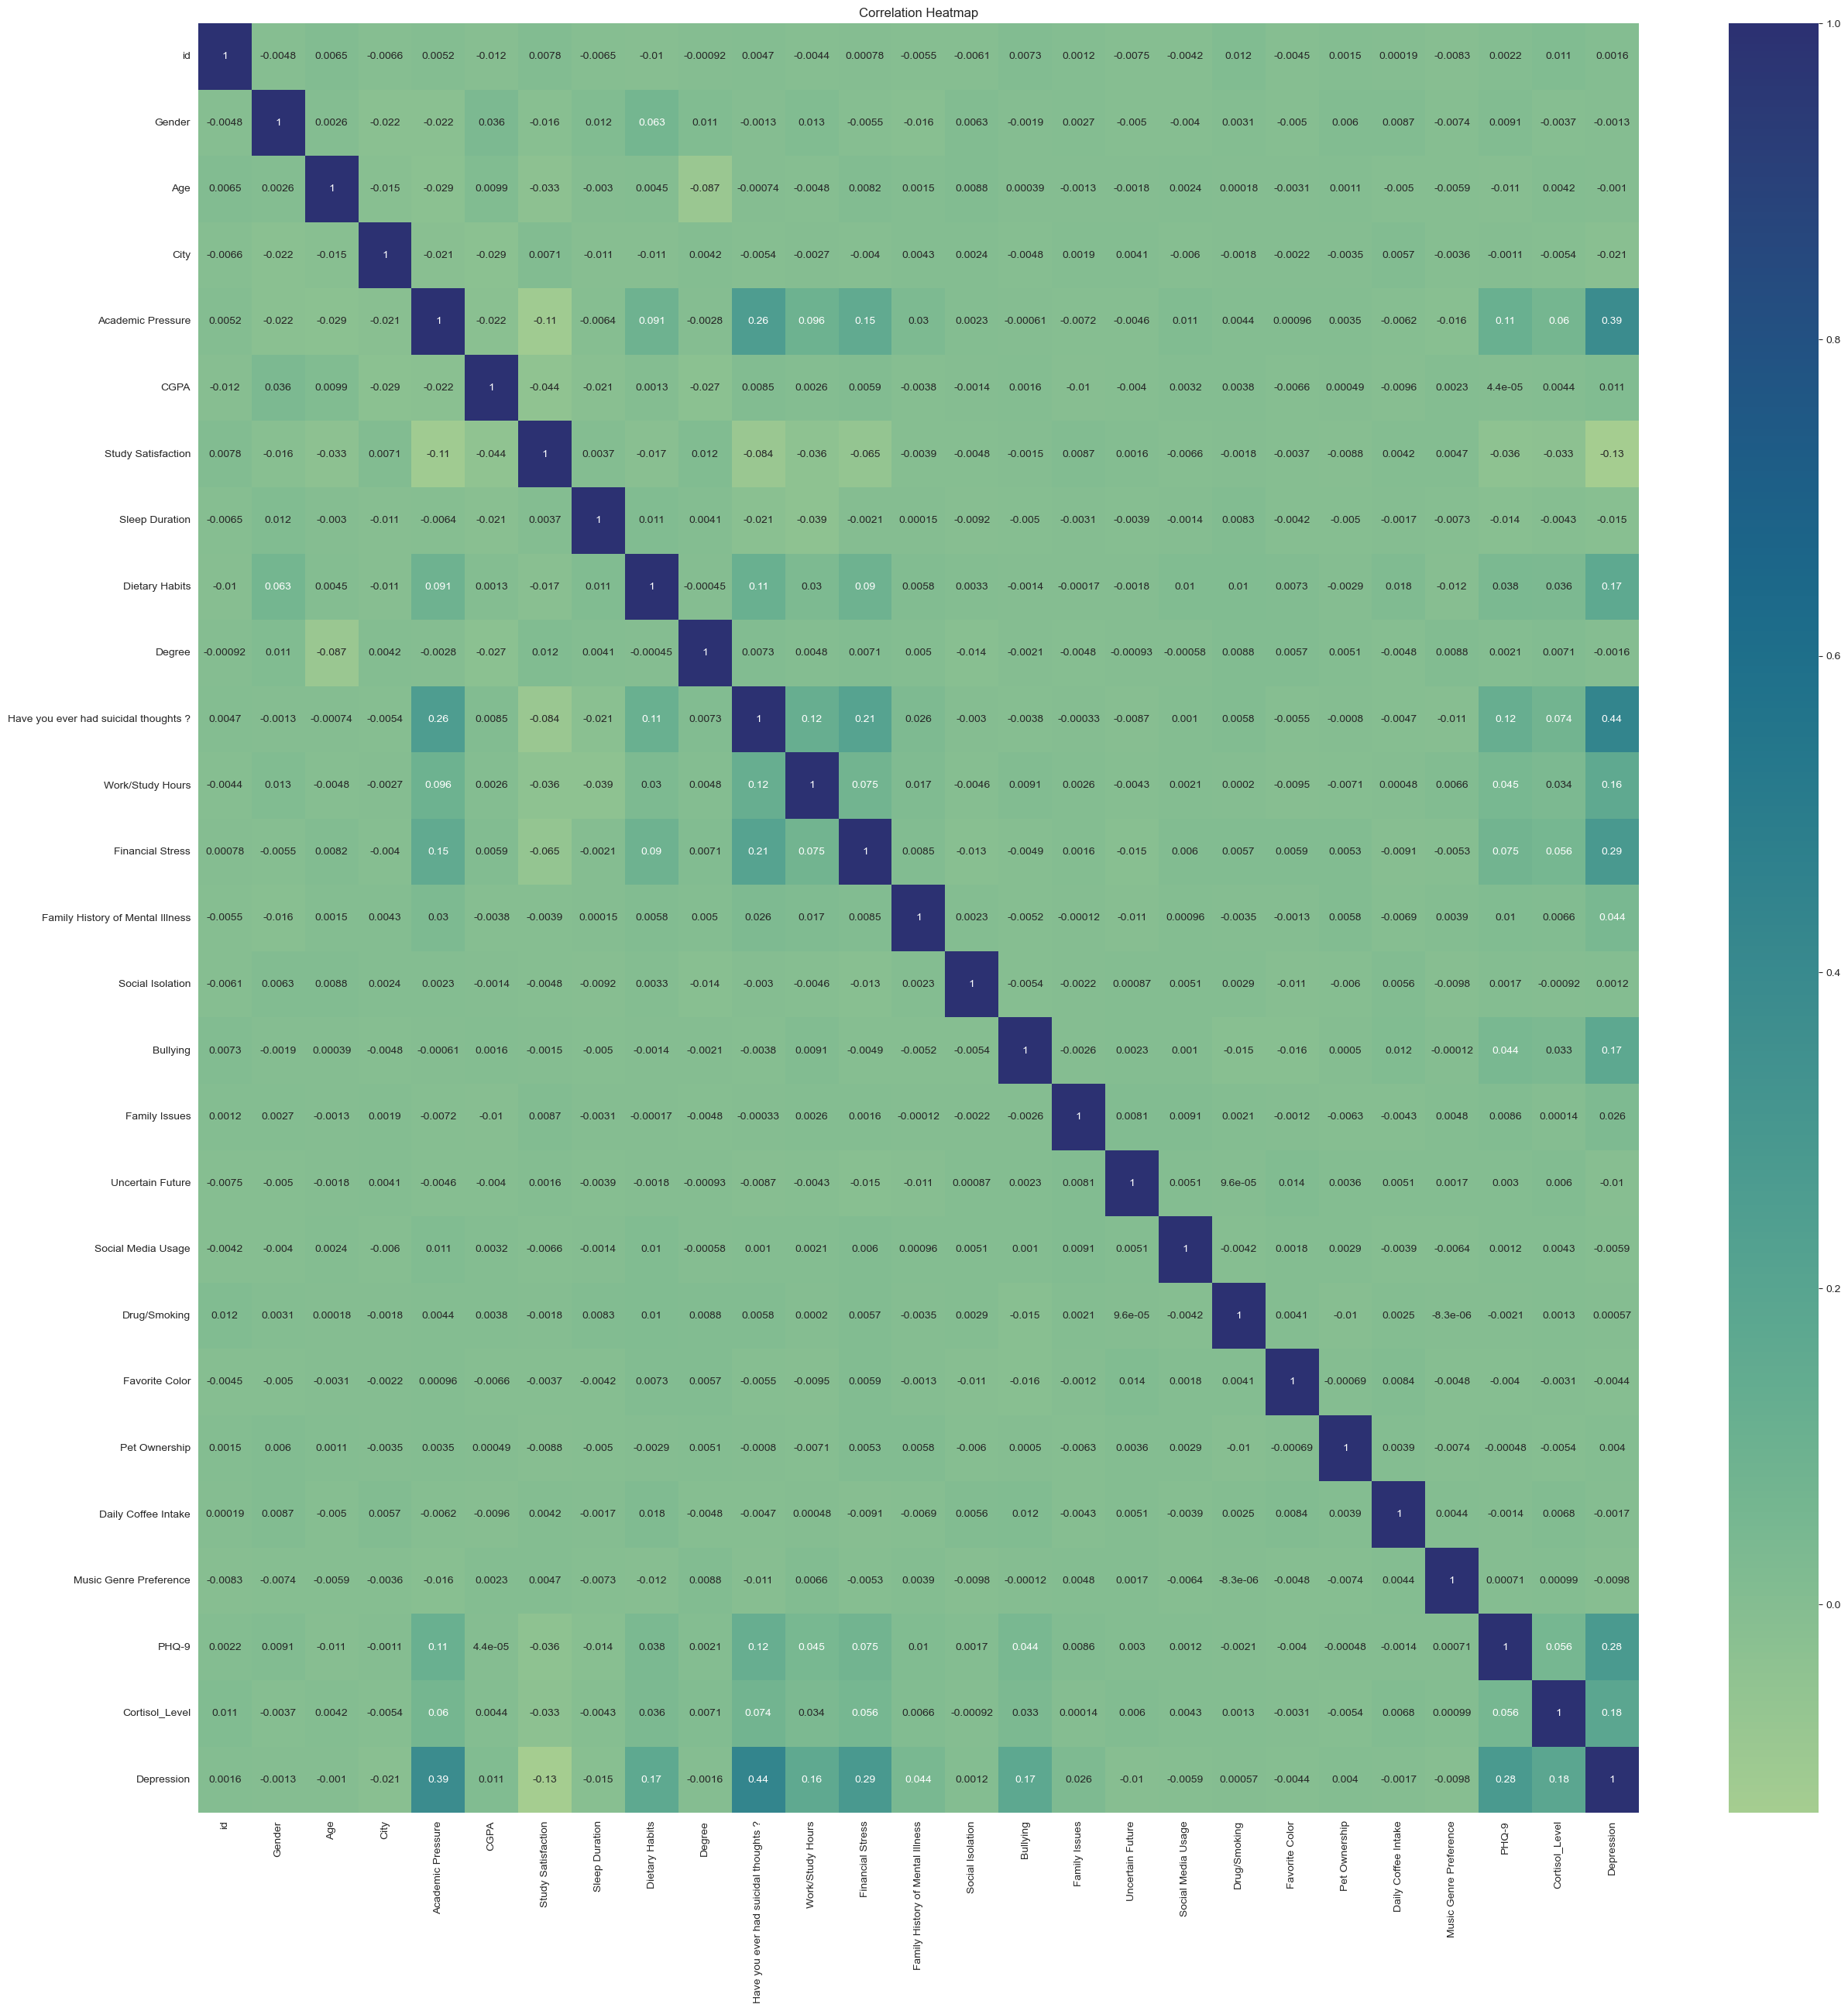

In [31]:
#heat map
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.title('Correlation Heatmap')
plt.show()


In [32]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix['Depression']
print(target_correlation)


id                                       0.001596
Gender                                  -0.001328
Age                                     -0.001012
City                                    -0.020997
Academic Pressure                        0.385063
CGPA                                     0.010543
Study Satisfaction                      -0.131795
Sleep Duration                          -0.014582
Dietary Habits                           0.165237
Degree                                  -0.001647
Have you ever had suicidal thoughts ?    0.435514
Work/Study Hours                         0.162389
Financial Stress                         0.286147
Family History of Mental Illness         0.044146
Social Isolation                         0.001239
Bullying                                 0.169139
Family Issues                            0.026149
Uncertain Future                        -0.010122
Social Media Usage                      -0.005881
Drug/Smoking                             0.000566


In [33]:
df.drop(['id'],axis=1,inplace=True)
df

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,Uncertain Future,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Depression
0,1,23.0,51,5.0,8.97,2.0,0,0,3,1,...,1,2,1,2,0,1,3,10,6.655000,1
1,0,24.0,3,2.0,5.90,5.0,0,1,10,0,...,2,4,1,4,0,1,4,4,5.123958,0
2,1,17.0,44,3.0,7.03,5.0,2,0,5,0,...,1,5,0,4,1,2,3,4,4.190609,0
3,0,17.0,49,3.0,5.59,2.0,1,1,7,1,...,2,1,1,0,1,4,0,9,7.467984,1
4,0,25.0,16,4.0,8.13,3.0,0,1,16,1,...,1,1,1,1,0,4,3,9,0.406585,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,25.0,45,5.0,5.75,5.0,0,3,11,1,...,1,5,1,1,0,1,1,1,2.362973,0
27897,1,19.0,25,2.0,9.40,3.0,2,0,22,0,...,3,5,1,4,1,0,0,5,2.683625,0
27898,1,23.0,9,3.0,6.61,4.0,0,3,0,0,...,4,4,1,2,0,1,2,8,4.565350,0
27899,0,18.0,25,5.0,6.88,2.0,2,0,11,1,...,3,5,0,3,1,0,2,11,9.556027,1


In [34]:
df.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness',
       'Social Isolation', 'Bullying', 'Family Issues', 'Uncertain Future',
       'Social Media Usage', 'Drug/Smoking', 'Favorite Color', 'Pet Ownership',
       'Daily Coffee Intake', 'Music Genre Preference', 'PHQ-9',
       'Cortisol_Level', 'Depression'],
      dtype='object')

In [35]:
def calculate_outlier_percentage(df):
    outlier_data = []

    for column in df.select_dtypes(include=[np.number]): 
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df)) * 100

        outlier_data.append([column, round(outlier_percentage, 2)])

    return pd.DataFrame(outlier_data, columns=['Feature', 'Outlier Percentage'])

outlier_df = calculate_outlier_percentage(df)
print(outlier_df)

                                  Feature  Outlier Percentage
0                                  Gender                0.00
1                                     Age                0.00
2                                    City                0.00
3                       Academic Pressure                0.00
4                                    CGPA                0.03
5                      Study Satisfaction                0.00
6                          Sleep Duration                0.06
7                          Dietary Habits                0.00
8                                  Degree                0.00
9   Have you ever had suicidal thoughts ?                0.00
10                       Work/Study Hours                0.00
11                       Financial Stress                0.00
12       Family History of Mental Illness                0.00
13                       Social Isolation                0.00
14                               Bullying                0.00
15      

In [36]:
df["Depression"].value_counts(normalize=True) * 100


Depression
1    69.004947
0    30.995053
Name: proportion, dtype: float64

In [37]:
df.to_csv("cleaned_data.csv", index=False)